In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score, roc_curve
from sklearn.preprocessing import normalize,StandardScaler
from sklearn import svm
from imblearn.over_sampling import SMOTENC
from xgboost import XGBClassifier
from scripts.utils import load_instafake, load_instafinal, load_instaauto

In [2]:
iris_data = load_iris()
instafake_data = load_instafake()
instafinal_data = load_instafinal()
instaauto_data = load_instaauto()

# Initial Features

In [47]:
instafake_data['data'].head()

,follower_following_ratio,user_biography_length,user_follower_count,user_following_count,user_has_profil_pic,user_is_private,user_media_count,username_digit_count,username_length
0,0.012907,0.0,25.0,1937.0,1.0,1.0,0.0,0.0,10.0
1,0.078603,0.0,324.0,4122.0,1.0,0.0,0.0,4.0,15.0
2,0.037594,0.0,15.0,399.0,0.0,0.0,0.0,3.0,12.0
3,0.130841,0.0,14.0,107.0,1.0,0.0,1.0,1.0,10.0
4,0.056762,0.0,264.0,4651.0,1.0,0.0,0.0,0.0,14.0


In [48]:
instafinal_data['data'].head()

,edge_followed_by,edge_follow,username_length,username_has_number,full_name_has_number,full_name_length,is_private,is_joined_recently,has_channel,is_business_account,has_guides,has_external_url
0,0.001,0.257,13,1,1,13,0,0,0,0,0,0
1,0.000,0.958,9,1,0,0,0,1,0,0,0,0
2,0.000,0.253,12,0,0,0,0,0,0,0,0,0
3,0.000,0.977,10,1,0,0,0,0,0,0,0,0
4,0.000,0.321,11,0,0,11,1,0,0,0,0,0


In [4]:
instaauto_data['data'].head()

,follower_following_ratio,user_biography_length,user_follower_count,user_following_count,user_has_external_url,user_has_highligh_reels,user_media_count,user_tags_count,username_digit_count,username_length
0,0.226787,133.0,1612.0,7108.0,1.0,0.0,97.0,36.0,0.0,12.0
1,3.320175,99.0,3028.0,912.0,0.0,1.0,863.0,77.0,0.0,11.0
2,4.505618,120.0,5213.0,1157.0,1.0,1.0,149.0,56.0,0.0,18.0
3,7.046512,55.0,12423.0,1763.0,0.0,0.0,33.0,2.0,0.0,13.0
4,3.936982,33.0,9496.0,2412.0,0.0,1.0,1000.0,91.0,0.0,8.0


In [5]:
instaauto_data['data'].shape

(1400, 10)

# Data Preperation

In [13]:
oversample = SMOTENC(categorical_features=[4,5,8],random_state=42)

In [7]:
instaauto_data['data'].head()

,follower_following_ratio,user_biography_length,user_follower_count,user_following_count,user_has_external_url,user_has_highligh_reels,user_media_count,user_tags_count,username_digit_count,username_length
0,0.226787,133.0,1612.0,7108.0,1.0,0.0,97.0,36.0,0.0,12.0
1,3.320175,99.0,3028.0,912.0,0.0,1.0,863.0,77.0,0.0,11.0
2,4.505618,120.0,5213.0,1157.0,1.0,1.0,149.0,56.0,0.0,18.0
3,7.046512,55.0,12423.0,1763.0,0.0,0.0,33.0,2.0,0.0,13.0
4,3.936982,33.0,9496.0,2412.0,0.0,1.0,1000.0,91.0,0.0,8.0


In [14]:
a_data,a_target = oversample.fit_resample(instaauto_data['data'],instaauto_data['target'])

In [19]:
scalar = StandardScaler()
a_data = scalar.fit_transform(a_data) 
X_train,X_test,y_train,y_test = train_test_split(a_data,a_target,test_size=.2,random_state=42,stratify=a_target)

In [20]:
X_train

array([[-4.82451227e-02, -9.14048696e-01, -4.80352841e-02, ...,
        -3.01024836e-02, -3.30685388e-01,  2.66756136e-01],
       [-4.73944835e-02, -2.83222437e-01, -1.21649564e-02, ...,
        -3.04400495e-02, -3.30685388e-01, -1.56520611e+00],
       [-4.59221705e-02,  1.66491748e+00, -3.25860189e-03, ...,
        -2.14382909e-02,  4.60754974e+00,  5.28465029e-01],
       ...,
       [-4.78856719e-02, -8.39833842e-01, -4.97735465e-02, ...,
        -3.11151814e-02, -3.30685388e-01,  5.04724294e-03],
       [-4.79004925e-02,  9.04215228e-01, -4.59923779e-02, ...,
        -3.10589204e-02, -3.30685388e-01,  7.90173922e-01],
       [-4.70979100e-02,  1.66491748e+00, -2.23436472e-02, ...,
        -2.40825575e-02, -3.30685388e-01, -2.56661650e-01]])

In [21]:
y_train

1348    0.0
14      1.0
467     1.0
632     1.0
842     0.0
       ... 
17      1.0
808     0.0
792     0.0
455     1.0
317     1.0
Name: automated_behaviour, Length: 1120, dtype: float64

# XGBoost

In [23]:
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(iris_data['data'], iris_data['target'], test_size=.2)
# create model instance
bst = XGBClassifier(objective='binary:logistic')
# fit model
bst.fit(X_train_iris, y_train_iris)
# make predictions
preds = bst.predict(X_test_iris)

In [24]:
print(classification_report(preds, y_test_iris))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.92      1.00      0.96        11
           2       1.00      1.00      1.00         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [22]:
xg_clf = XGBClassifier(objective='binary:logistic')
xg_clf.fit(X_train,y_train)
xg_res = xg_clf.predict(X_test)

In [23]:
confusion_matrix(xg_res,y_test)

array([[135,   9],
       [  5, 131]])

In [24]:
accuracy_score(xg_res, y_test)

0.95

In [25]:
print(classification_report(xg_res, y_test))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       144
           1       0.94      0.96      0.95       136

    accuracy                           0.95       280
   macro avg       0.95      0.95      0.95       280
weighted avg       0.95      0.95      0.95       280



In [26]:
y_probs = xg_clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

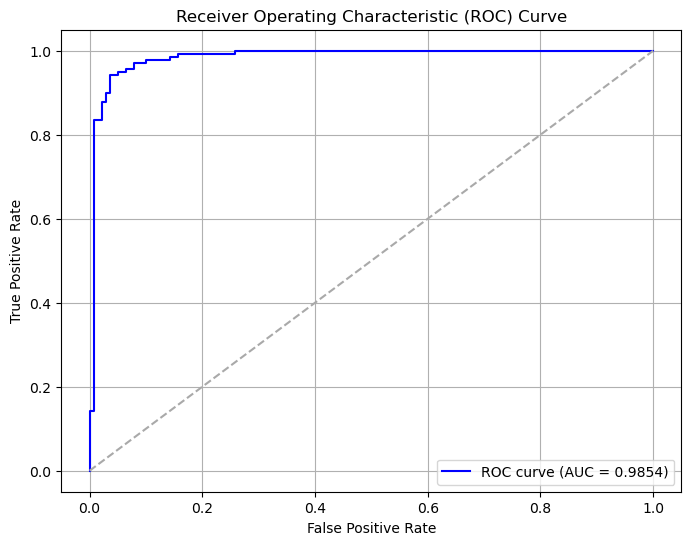

In [27]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='darkgrey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# SVM with Meta-Heuristic Optimisation

SVM with no feature selection for base test

In [43]:
svm_clf = svm.SVC()
svm_clf.fit(x_train,y_train)
svm_res = svm_clf.predict(x_test)

In [50]:
print(confusion_matrix(svm_res, y_test))

[[196  13]
 [  3  27]]


In [44]:
print(classification_report(svm_res, y_test))

              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96       209
         1.0       0.68      0.90      0.77        30

    accuracy                           0.93       239
   macro avg       0.83      0.92      0.87       239
weighted avg       0.95      0.93      0.94       239



In [ ]:
svvm_clf = svm.SVC()
svvm_clf.fit(

In [6]:
import pandas as pd
from sklearn.preprocessing import normalize
from scripts.utils import generic_load

ndata = generic_load('./insta_meme/resources/dataset.csv',target='automated_behaviour')
ndata['target'].to_csv('./insta_meme/resources/data-target.csv',index=False)
pd.DataFrame(normalize(ndata['data'])).to_csv('./insta_meme/resources/data-data.csv',index=False)

In [29]:
pd.DataFrame(X_train).to_csv('./train-data.csv',index=False)
pd.DataFrame(y_train).to_csv('./train-target.csv',index=False)
pd.DataFrame(X_test).to_csv('./test-data.csv',index=False)
pd.DataFrame(y_test).to_csv('./test-target.csv',index=False)